# Data analysis

In [3]:
import numpy as np
import SimpleITK as sitk
import pandas as pd
import os
import matplotlib.pyplot as plt

In [45]:
train_directory = '../data/Brats17TrainingData/'
valid_directory = '../data/Brats17ValidationData/'
test_directory = '../data/Brats17TestingData/'

### Supplementary dataset

In [41]:
df = pd.read_csv(data_directory + 'survival_data.csv')
df.head()

,Brats17ID,Age,Survival
0,Brats17_TCIA_167_1,74.907,153
1,Brats17_TCIA_242_1,66.479,147
2,Brats17_TCIA_319_1,64.860,254
3,Brats17_TCIA_469_1,63.899,519
4,Brats17_TCIA_218_1,57.345,346


In [42]:
df.shape

(163, 3)

# Image dataset
#### T1, T1Gd, T2, FLAIR modalities + Segmentation mask of tumor 

In [68]:
def imshow(vol,title:str, ax=None):
    vol = sitk.GetArrayFromImage(vol)
    if ax:
        ax.imshow(vol[len(vol) // 2], cmap = 'gray')
        ax.axis('off')
        ax.set_title(title)
        
    
def imshow_slice(vol,slic,title:str):
    vol = sitk.GetArrayFromImage(vol)
    plt.figure()
    plt.imshow(vol[slic], cmap = 'gray')
    plt.axis('off')
    plt.title(title)
    
def show_mid_slice(vol,title):
    plt.imshow(vol[len(vol) // 2], cmap = 'gray')
    plt.axis('off')
    plt.title(title)

In [49]:
print('Number of training samples: ',len(os.listdir(train_directory + 'HGG')) + len(os.listdir(train_directory + 'LGG')))
print('Number of validation samples: ',len(os.listdir(valid_directory)))
print('Number of testing samples: ',len(os.listdir(test_directory )))

Number of training samples:  285
Number of validation samples:  47
Number of testing samples:  147


#### Read images with library SimpleITK

In [76]:
sitk_t1 = sitk.ReadImage(os.path.join(data_directory , 'HGG/Brats17_2013_10_1/Brats17_2013_10_1_t1.nii.gz'), sitk.sitkFloat32)
sitk_t1ce = sitk.ReadImage(os.path.join(data_directory , 'HGG/Brats17_2013_10_1/Brats17_2013_10_1_t1ce.nii.gz'), sitk.sitkFloat32)
sitk_t2 = sitk.ReadImage(os.path.join(data_directory , 'HGG/Brats17_2013_10_1/Brats17_2013_10_1_t2.nii.gz'), sitk.sitkFloat32)
sitk_flair = sitk.ReadImage(os.path.join(data_directory , 'HGG/Brats17_2013_10_1/Brats17_2013_10_1_flair.nii.gz'), sitk.sitkFloat32)
sitk_seg = sitk.ReadImage(os.path.join(data_directory , 'HGG/Brats17_2013_10_1/Brats17_2013_10_1_seg.nii.gz'), sitk.sitkFloat32)

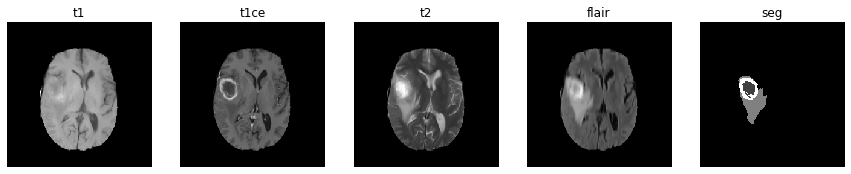

In [78]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
imshow(sitk_t1, "t1",axs[0])
imshow(sitk_t1ce, "t1ce",axs[1])
imshow(sitk_t2, "t2",axs[2])
imshow(sitk_flair, "flair", axs[3])
imshow(sitk_seg, "seg", axs[4])

Samples of all modalitis. 

#### Size of each image

In [80]:
print(sitk.GetArrayFromImage(sitk_seg).shape)
print(sitk.GetArrayFromImage(sitk_t1).shape)
print(sitk.GetArrayFromImage(sitk_t1ce).shape)
print(sitk.GetArrayFromImage(sitk_t2).shape)
print(sitk.GetArrayFromImage(sitk_flair).shape)

(155, 240, 240)
(155, 240, 240)
(155, 240, 240)
(155, 240, 240)
(155, 240, 240)


#### Distributions of pixel intensity

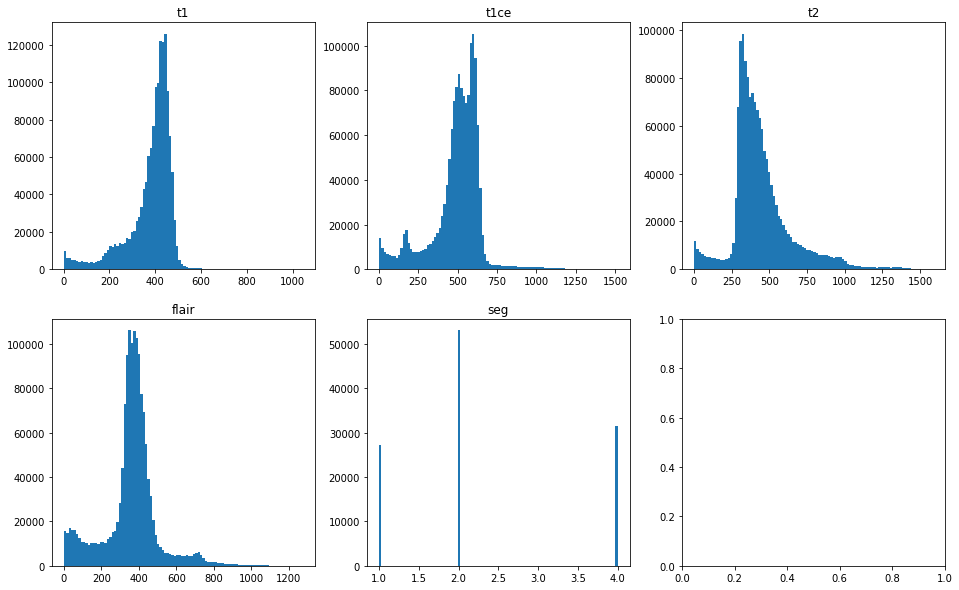

In [92]:
def histogram(ax, image, title):
    vol = sitk.GetArrayFromImage(image)
    ax.hist(vol[vol > 0].flatten(), bins=100);
    ax.set_title(title)

fig, axs = plt.subplots(2, 3, figsize=(16, 10))
histogram(axs[0][0],sitk_t1, "t1")
histogram(axs[0][1],sitk_t1ce, "t1ce")
histogram(axs[0][2],sitk_t2, "t2")
histogram(axs[1][0],sitk_flair, "flair")
histogram(axs[1][1],sitk_seg, "seg")

### Number of pixels in 
Annotations
* GD-enhancing tumor (ET — label 4)
* Peritumoral edema (ED — label 2)
* the necrotic and non-enhancing tumor core (NCR/NET — label 1)

In [104]:
seg_image_names = os.listdir(train_directory + 'HGG')

In [111]:
from collections import Counter
for name in seg_image_names:
    image = sitk.ReadImage(os.path.join(data_directory , 'HGG/' + name + '/'+ name +'_seg.nii.gz'), sitk.sitkInt32)
    vol = sitk.GetArrayFromImage(image).flatten()
    print(Counter(vol))

Counter({0: 8875102, 2: 46780, 4: 4951, 1: 1167})
Counter({0: 8901500, 4: 9563, 2: 9070, 1: 7867})
Counter({0: 8907124, 2: 7466, 1: 6878, 4: 6532})
Counter({0: 8840676, 2: 52794, 1: 18358, 4: 16172})
Counter({0: 8884536, 2: 32904, 4: 6688, 1: 3872})
Counter({0: 8907513, 2: 15607, 4: 4467, 1: 413})
Counter({0: 8744906, 2: 106834, 4: 50901, 1: 25359})
Counter({0: 8827242, 2: 86045, 1: 7491, 4: 7222})
Counter({0: 8805266, 2: 58885, 1: 37590, 4: 26259})
Counter({0: 8897346, 2: 18725, 4: 9619, 1: 2310})
Counter({0: 8764388, 4: 79560, 2: 57398, 1: 26654})
Counter({0: 8888589, 2: 32237, 4: 4321, 1: 2853})
Counter({0: 8898193, 2: 26076, 4: 2998, 1: 733})
Counter({0: 8717673, 2: 133618, 4: 42366, 1: 34343})
Counter({0: 8867644, 1: 21996, 2: 21263, 4: 17097})
Counter({0: 8897510, 2: 19594, 4: 8609, 1: 2287})
Counter({0: 8845220, 1: 35661, 4: 32372, 2: 14747})
Counter({0: 8751944, 1: 76834, 2: 60217, 4: 39005})
Counter({0: 8777195, 4: 87753, 2: 47101, 1: 15951})
Counter({0: 8832609, 2: 66878, 4: 

Counter({0: 8881661, 2: 31804, 1: 10496, 4: 4039})
Counter({0: 8828091, 2: 92012, 4: 6149, 1: 1748})
Counter({0: 8890571, 2: 29723, 1: 5082, 4: 2624})
Counter({0: 8884119, 2: 17488, 4: 14699, 1: 11694})
Counter({0: 8917899, 4: 4518, 2: 3806, 1: 1777})
Counter({0: 8907065, 4: 9281, 2: 5908, 1: 5746})
Counter({0: 8868794, 2: 31713, 4: 25463, 1: 2030})
Counter({0: 8808686, 2: 105764, 4: 10957, 1: 2593})
Counter({0: 8849185, 2: 30607, 4: 24262, 1: 23946})
Counter({0: 8752325, 1: 91299, 2: 56966, 4: 27410})
Counter({0: 8788743, 2: 73741, 1: 45839, 4: 19677})
Counter({0: 8788770, 2: 94456, 4: 24947, 1: 19827})
Counter({0: 8857219, 4: 26417, 1: 22932, 2: 21432})
Counter({0: 8806430, 2: 104016, 4: 13105, 1: 4449})
Counter({0: 8773492, 2: 84003, 4: 45111, 1: 25394})
Counter({0: 8800811, 2: 86107, 1: 28051, 4: 13031})
Counter({0: 8809606, 2: 103227, 4: 8577, 1: 6590})
Counter({0: 8836868, 2: 79370, 4: 8613, 1: 3149})
Counter({0: 8854342, 2: 63100, 4: 7167, 1: 3391})
Counter({0: 8885767, 2: 30952